In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [2]:
X,y = mglearn.datasets.make_wave(n_samples=60)   # make sample data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape

(45, 1)

In [3]:
lr = LinearRegression()       #모델생성
lr.fit(X_train, y_train)   #훈련 -> weight(가중치) 찾기

LinearRegression()

In [4]:
lr.coef_ , lr.intercept_   # y=lr.coef_ * x + lr.intercept_ ///// # lr.coef_: weight(가중치) 값  /// lr.intercept_ : 절편 값 

(array([0.39390555]), -0.03180434302675973)

In [5]:
print(X_train[0])
print(X_train[0] * lr.coef_ + lr.intercept_, y_train[0])    #예측값, 실제값
print(lr.predict(X_train[:2])[0], y_train[0] ) # 예측값, 실제값

[0.14853859]
[0.02670583] 0.26134392555935987
0.026705832055439423 0.26134392555935987


In [6]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6700890315075756, 0.6593368596863701)

In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
X.shape

(506, 104)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
lr.coef_.shape

(104,)

In [12]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9448313975211591, 0.7758378393351623)

In [43]:
rlr = Ridge(alpha=0.1)  # alpha 조절기 이용/ alpha값에 따라 과소적합, 과대적홥 확인 가능. 적합한 값을 찾아보는 것.
rlr.fit(X_train, y_train)
rlr.score(X_train, y_train), rlr.score(X_test, y_test)

(0.9174870139232213, 0.8246491875314658)

In [64]:
(rlr.coef_ != 0).sum()

104

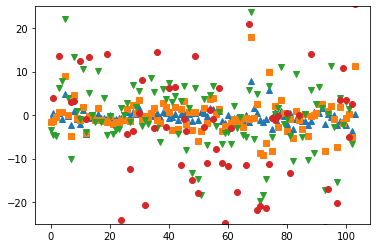

In [65]:
rlr10 = Ridge(alpha=10) 
rlr10.fit(X_train, y_train)


rlr1 = Ridge()  
rlr1.fit(X_train, y_train)


rlr01 = Ridge(alpha=0.1)  
rlr01.fit(X_train, y_train)

plt.plot(rlr10.coef_, '^')
plt.plot(rlr1.coef_, 's')
plt.plot(rlr01.coef_, 'v')

plt.plot(lr.coef_, 'o')
plt.ylim(-25, 25)
plt.show()

In [59]:
llr = Lasso(alpha=0.001 , max_iter=100000)
llr.fit(X_train, y_train)
llr.score(X_train, y_train), llr.score(X_test, y_test)   # alpha 설정 전 값 : (0.26783778369518485, 0.2599232118344591) 과소적합

(0.9327758606898219, 0.8180643704626334)

In [63]:
# llr.coef_.shape
(llr.coef_ != 0).sum()   #0이 아닌 개수는 73개.

73

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [87]:
# load_diabetes 함수를 사용해서 당뇨병 데이터 준비
# 선형 회귀 알고리즘을 사용해서 최적 모델을 만드시오

In [88]:
diabetes = load_diabetes()

In [89]:
# diabetes   # data, target, frame , DESCR , feature_names

In [90]:
X, y = diabetes['data'], diabetes['target']
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((331, 10), (111, 10), (331,), (111,))

In [92]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.5190348343200994, 0.48490866359058005)

In [94]:
lr.coef_ , lr.intercept_

(array([  47.74657117, -241.99180361,  531.96856896,  381.56529922,
        -918.49020552,  508.25147385,  116.94040498,  269.48508571,
         695.8062205 ,   26.32343144]),
 151.66516982689936)

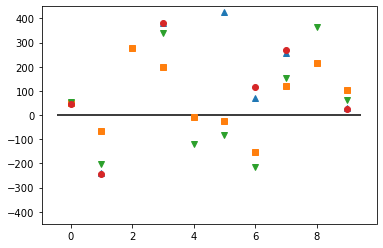

In [96]:
rlr1 = Ridge(alpha=1)  
rlr1.fit(X_train, y_train) 
# rlr1.score(X_train, y_train), rlr.score(X_test, y_test)

rlr01 = Ridge(alpha=0.1)  
rlr01.fit(X_train, y_train) 
# rlr01.score(X_train, y_train), rlr.score(X_test, y_test)

rlr10 = Ridge(alpha=0.001)  
rlr10.fit(X_train, y_train)  
# rlr10.score(X_train, y_train), rlr.score(X_test, y_test)

plt.plot(rlr10.coef_, '^')
plt.plot(rlr1.coef_, 's')
plt.plot(rlr01.coef_, 'v')

plt.plot(lr.coef_, 'o')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-450, 450)
plt.show()

In [42]:
la = Lasso()
la.fit(X_train, y_train)

Lasso()

In [44]:
la.score(X_train, y_train), la.score(X_test, y_test)

(0.3468742610233214, 0.37914194389255107)

In [50]:
# la.coef_.shape
(la.coef_ != 0).sum()

3

In [57]:
la1 = Lasso(alpha=1)
la1.fit(X_train, y_train)
la1.score(X_train, y_train), la1.score(X_test, y_test)   #(0.3468742610233214, 0.37914194389255107)

la01 = Lasso(alpha=0.1)
la01.fit(X_train, y_train)
la01.score(X_train, y_train), la01.score(X_test, y_test)  #(0.5078274286916008, 0.501975882135411)

la001 = Lasso(alpha=0.01)
la001.fit(X_train, y_train)
la001.score(X_train, y_train), la001.score(X_test, y_test) #(0.517666513166295, 0.48803832998064045)



(0.517666513166295, 0.48803832998064045)

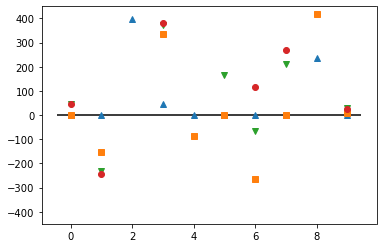

In [66]:
# Lasso 와 LinearRegression 비교
plt.plot(la1.coef_, '^')
plt.plot(la01.coef_, 's')
plt.plot(la001.coef_, 'v')

plt.plot(lr.coef_, 'o')
# xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-450, 450)
plt.show()

In [110]:
# !pip install statsmodels    #통계 분석 패키지 

In [67]:
# load_diabetes 함수를 사용해서 당뇨병 데이터 준비
# 선형 회귀 알고리즘을 사용해서 최적 모델을 만드시오

In [112]:
import numpy as np     # 다차원 지원
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm    # 전문 통계 분석 패키지 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [98]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [99]:
diabetes.target[:5] #target은 연속형 값(회귀 모델 적용해야함)

array([151.,  75., 141., 206., 135.])

In [100]:
X, y = diabetes['data'], diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)   # 과소적합 상태임

(0.5190348343200994, 0.48490866359058005)

In [102]:
rlr = Ridge(alpha=0.001)
rlr.fit(X_train, y_train)
rlr.score(X_train, y_train), rlr.score(X_test, y_test)

(0.5189592050526448, 0.48544158356171696)

In [103]:
llr = Lasso(alpha=0.01)
llr.fit(X_train, y_train)
llr.score(X_train, y_train), llr.score(X_test, y_test)

(0.517666513166295, 0.48803832998064045)

In [104]:
llr.coef_.shape , (llr.coef_ != 0).sum()

((10,), 10)

In [105]:
diabetes_df=pd.DataFrame(X, columns=diabetes['feature_names'])
diabetes_df['target'] = diabetes['target']
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


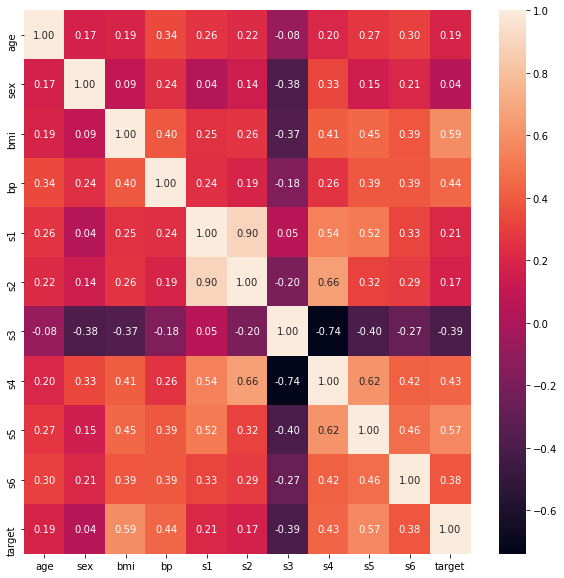

In [108]:
# 상관 계수 확인
# diabetes_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.corr(), cbar=True, annot=True, fmt='.2f', xticklabels=diabetes_df.columns, yticklabels=diabetes_df.columns)
plt.show()

In [117]:
xt = sm.add_constant(X_train)
model = sm.OLS(y_train, xt)  #선형회귀 모델 만들기
model2=model.fit()

In [118]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     34.53
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.97e-45
Time:                        15:29:54   Log-Likelihood:                -1789.5
No. Observations:                 331   AIC:                             3601.
Df Residuals:                     320   BIC:                             3643.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.6652      3.023     50.162      0.000     145.717     157.614
x1            47.7466     71.642      0.666      0.506     -93.202     188.695
x2          -241.9918     70.762     -3.420      0.001    -381.210    -102.774
x3           531.9686     79.049      6.730      0.000     376.447     687.490
x4           381.5653     75.058      5.084      0.000     233.897     529.234
x5          -918.4902    462.125     -1.988      0.048   -1827.677      -9.303
x6           508.2515    372.857      1.363      0.174    -225.310    1241.813
x7           116.9404    238.509      0.490      0.624    -352.303     586.184
x8           269.4851    190.628      1.414      0.158    -105.558     644.528
x9           695.8062    196.699      3.537      0.000     308.820    1082.793
x10           26.3234     76.855      0.343      0.732    -124.882     177.529
==============================================================================
Omnibus:                        2.208   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.934
Skew:                           0.078   Prob(JB):                        0.380
Kurtosis:                       2.659   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""